In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn

<b>Variable descriptions<br/>
Name	Description</b><br/>
1	Year	1987-2008<br/>
2	Month	1-12<br/>
3	DayofMonth	1-31<br/>
4	DayOfWeek	1 (Monday) - 7 (Sunday)<br/>
5	DepTime	actual departure time (local, hhmm)<br/>
6	CRSDepTime	scheduled departure time (local, hhmm)<br/>
7	ArrTime	actual arrival time (local, hhmm)<br/>
8	CRSArrTime	scheduled arrival time (local, hhmm)<br/>
9	UniqueCarrier	unique carrier code<br/>
10	FlightNum	flight number<br/>
11	TailNum	plane tail number<br/>
12	ActualElapsedTime	in minutes<br/>
13	CRSElapsedTime	in minutes<br/>
14	AirTime	in minutes<br/>
15	ArrDelay	arrival delay, in minutes<br/>
16	DepDelay	departure delay, in minutes<br/>
17	Origin	origin IATA airport code<br/>
18	Dest	destination IATA airport code<br/>
19	Distance	in miles<br/>
20	TaxiIn	taxi in time, in minutes<br/>
21	TaxiOut	taxi out time in minutes<br/>
22	Cancelled	was the flight cancelled?<br/>
23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)<br/>
24	Diverted	1 = yes, 0 = no<br/>
25	CarrierDelay	in minutes<br/>
26	WeatherDelay	in minutes<br/>
27	NASDelay	in minutes<br/>
28	SecurityDelay	in minutes<br/>
29	LateAircraftDelay	in minutes

In [2]:
df = pd.read_csv(r"C:\Users\Niranjan\Desktop\Data Science\datasets\Supervised learning potpourri\Airline Arrivals 2008.csv")
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [3]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               136246
CRSDepTime                 0
ArrTime               151649
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                83365
ActualElapsedTime     154699
CRSElapsedTime           844
AirTime               154699
ArrDelay              154699
DepDelay              136246
Origin                     0
Dest                       0
Distance                   0
TaxiIn                151649
TaxiOut               137058
Cancelled                  0
CancellationCode     6872294
Diverted                   0
CarrierDelay         5484993
WeatherDelay         5484993
NASDelay             5484993
SecurityDelay        5484993
LateAircraftDelay    5484993
dtype: int64

In [4]:
cols = ['Year','CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','CancellationCode']
df_filtered = df.drop(cols, axis=1)#inplace=True
print(df_filtered.columns)
print(df_filtered.isnull().sum())

Index(['Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime',
       'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'Diverted'],
      dtype='object')
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime              136246
CRSDepTime                0
ArrTime              151649
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum               83365
ActualElapsedTime    154699
CRSElapsedTime          844
AirTime              154699
ArrDelay             154699
DepDelay             136246
Origin                    0
Dest                      0
Distance                  0
TaxiIn               151649
TaxiOut              137058
Cancelled                 0
Diverted                  0
dtype: int64


In [5]:
df_filtered = df_filtered.dropna()
df_filtered.count()

Month                6855024
DayofMonth           6855024
DayOfWeek            6855024
DepTime              6855024
CRSDepTime           6855024
ArrTime              6855024
CRSArrTime           6855024
UniqueCarrier        6855024
FlightNum            6855024
TailNum              6855024
ActualElapsedTime    6855024
CRSElapsedTime       6855024
AirTime              6855024
ArrDelay             6855024
DepDelay             6855024
Origin               6855024
Dest                 6855024
Distance             6855024
TaxiIn               6855024
TaxiOut              6855024
Cancelled            6855024
Diverted             6855024
dtype: int64

In [6]:
df_filtered['ActualArrDelay'] = df_filtered['ArrDelay'] - 30
df_filtered.describe()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,ActualArrDelay
count,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6.855024e+06,6855024.0,6855024.0,6.855024e+06
mean,6.388525e+00,1.573826e+01,3.925802e+00,1.333775e+03,1.325037e+03,1.481265e+03,1.493715e+03,2.212505e+03,1.273224e+02,1.290778e+02,1.040186e+02,8.168407e+00,9.923807e+00,7.287441e+02,6.860150e+00,1.644368e+01,0.0,0.0,-2.183159e+01
std,3.398833e+00,8.801085e+00,1.988459e+00,4.780574e+02,4.643130e+02,5.051322e+02,4.826643e+02,1.956435e+03,7.018733e+01,6.953273e+01,6.743981e+01,3.850179e+01,3.520373e+01,5.632449e+02,4.931225e+00,1.131062e+01,0.0,0.0,3.850179e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,-1.410000e+02,0.000000e+00,-5.190000e+02,-5.340000e+02,1.100000e+01,0.000000e+00,0.000000e+00,0.0,0.0,-5.490000e+02
25%,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.180000e+02,7.700000e+01,8.000000e+01,5.500000e+01,-1.000000e+01,-4.000000e+00,3.260000e+02,4.000000e+00,1.000000e+01,0.0,0.0,-4.000000e+01
50%,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.317000e+03,1.512000e+03,1.515000e+03,1.563000e+03,1.100000e+02,1.110000e+02,8.600000e+01,-2.000000e+00,-1.000000e+00,5.810000e+02,6.000000e+00,1.400000e+01,0.0,0.0,-3.200000e+01
75%,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.905000e+03,3.494000e+03,1.570000e+02,1.590000e+02,1.320000e+02,1.200000e+01,8.000000e+00,9.540000e+02,8.000000e+00,1.900000e+01,0.0,0.0,-1.800000e+01
max,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.359000e+03,9.741000e+03,1.379000e+03,6.600000e+02,1.350000e+03,2.461000e+03,2.467000e+03,4.962000e+03,3.080000e+02,4.290000e+02,0.0,0.0,2.431000e+03


In [7]:
df_filtered.corr()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,ActualArrDelay
Month,1.000000,-0.000402,-0.005350,-0.010320,-0.008425,-0.000376,0.000353,0.005307,-0.014061,-0.006346,-0.012413,-0.042058,-0.030498,-0.005558,0.006904,-0.016249,NaN,NaN,-0.042058
DayofMonth,-0.000402,1.000000,0.004762,-0.001555,-0.001745,-0.001505,-0.001744,-0.000284,0.000598,0.001384,0.000950,0.001605,0.003297,0.001363,-0.002934,-0.000675,NaN,NaN,0.001605
DayOfWeek,-0.005350,0.004762,1.000000,0.005660,0.005666,0.003376,0.005569,-0.001438,0.012929,0.015013,0.013915,0.010557,0.015424,0.016730,0.010243,-0.007206,NaN,NaN,0.010557
DepTime,-0.010320,-0.001555,0.005660,1.000000,0.968550,0.713081,0.791431,-0.006074,-0.017070,-0.013684,-0.023170,0.178274,0.201981,-0.016523,-0.042255,0.050649,NaN,NaN,0.178274
CRSDepTime,-0.008425,-0.001745,0.005666,0.968550,1.000000,0.697293,0.790820,-0.012512,-0.017184,-0.011775,-0.021086,0.116894,0.138850,-0.012189,-0.047563,0.039827,NaN,NaN,0.116894
ArrTime,-0.000376,-0.001505,0.003376,0.713081,0.697293,1.000000,0.862455,-0.017674,0.037625,0.038654,0.030320,0.066020,0.073539,0.029023,0.007131,0.049582,NaN,NaN,0.066020
CRSArrTime,0.000353,-0.001744,0.005569,0.791431,0.790820,0.862455,1.000000,-0.029613,0.051469,0.056582,0.044016,0.113087,0.132824,0.046195,-0.006540,0.059792,NaN,NaN,0.113087
FlightNum,0.005307,-0.000284,-0.001438,-0.006074,-0.012512,-0.017674,-0.029613,1.000000,-0.319347,-0.326568,-0.334444,0.016601,0.009832,-0.348495,-0.009481,0.016576,NaN,NaN,0.016601
ActualElapsedTime,-0.014061,0.000598,0.012929,-0.017070,-0.017184,0.037625,0.051469,-0.319347,1.000000,0.979875,0.984241,0.093926,0.044380,0.964521,0.158444,0.267801,NaN,NaN,0.093926
CRSElapsedTime,-0.006346,0.001384,0.015013,-0.013684,-0.011775,0.038654,0.056582,-0.326568,0.979875,1.000000,0.988173,0.012642,0.035357,0.983176,0.104174,0.143128,NaN,NaN,0.012642


In [8]:
from sklearn.feature_selection import VarianceThreshold
df_rmvObjects = df_filtered.loc[:, ~df_filtered.columns.isin(['UniqueCarrier', 'TailNum', 'Origin', 'Dest'])]
constant_filter = VarianceThreshold(threshold=(.8 * (1 - .8)))
constant_filter.fit(df_rmvObjects)
print(len(df_rmvObjects.columns[constant_filter.get_support()]))

constant_columns = [column for column in df_rmvObjects.columns
                    if column not in df_rmvObjects.columns[constant_filter.get_support()]]
print(constant_columns)
#constant_filter.transform(df_rmvObjects)

17
['Cancelled', 'Diverted']


In [9]:
df_filtered.drop(constant_columns, axis=1, inplace=True)
df_filtered.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,ActualArrDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,-44.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,-28.0
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,-16.0
3,1,3,4,926.0,930,1054.0,1100,WN,1746,N612SW,...,90.0,78.0,-6.0,-4.0,IND,BWI,515,3.0,7.0,-36.0
4,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,4.0


In [10]:
print(df_filtered.dtypes)
print(df_filtered['TailNum'].value_counts())
print(df_filtered['Origin'].value_counts())
print(df_filtered['Dest'].value_counts())

Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
ActualArrDelay       float64
dtype: object
N476HA    4701
N477HA    4546
N484HA    4504
N475HA    4496
N480HA    4416
N481HA    4372
N478HA    4316
N485HA    4309
N479HA    4266
N486HA    4245
N487HA    4141
N27318    3462
N77278    3292
N37342    3203
N270YV    3158
N288SW    3097
N290SW    3081
N223SW    3050
N87353    3049
N77302    3048
N284YV    2970
N393SW    2935
N220SW    2929
N233SW    2927
N234SW    2871
N2

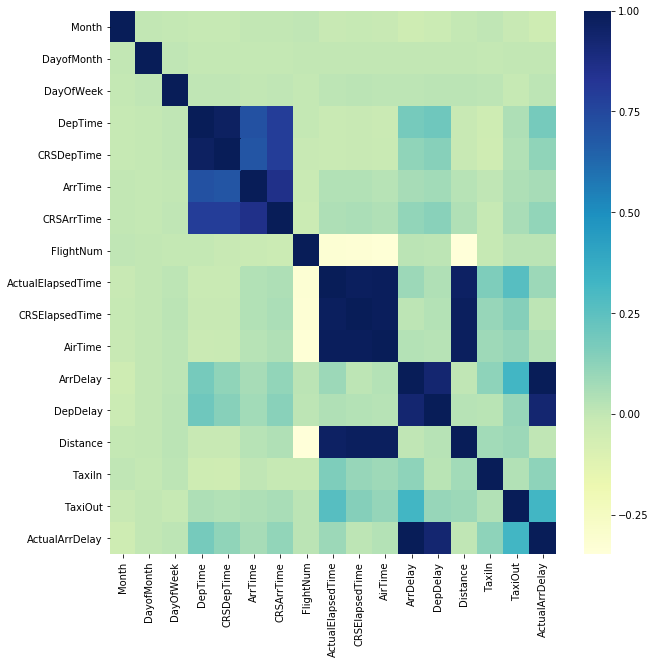

In [11]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(data=df_filtered.corr(), cmap="YlGnBu")

Text(0.5, 0, 'Arrival Time')

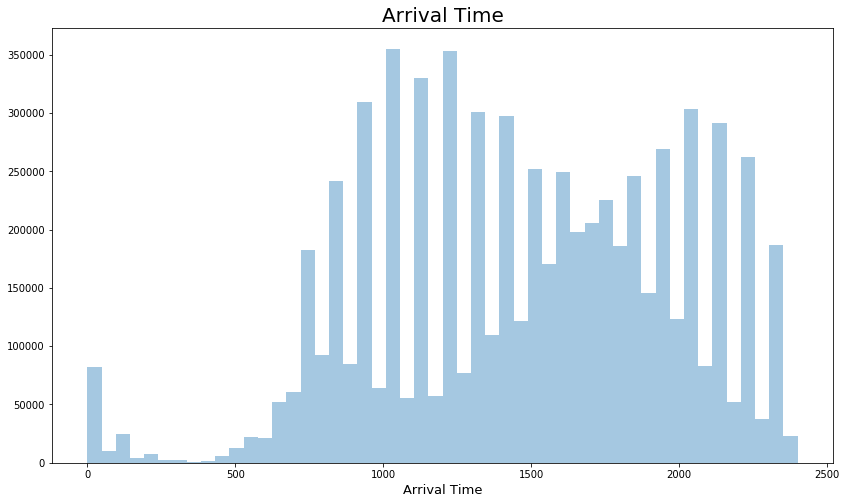

In [12]:
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(df_filtered['ArrTime'],ax=ax,kde=False)
ax.set_title('Arrival Time',fontsize=20)
ax.set_xlabel('Arrival Time',fontsize=13)

In [13]:
#Ridge regression
from sklearn import linear_model

Y = df_filtered['ActualArrDelay'].values.reshape(-1, 1)
X = df_filtered.loc[:, ~(df_filtered.columns).isin(['ActualArrDelay', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest'])]

ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X, Y)
print(ridgeregr.score(X, Y))
origparams = ridgeregr.coef_[0]
print(origparams)

0.9832194006992719
[-4.61083983e-01 -1.68233322e-01 -8.12822250e-01  1.31241000e-03
 -4.31968258e-03 -1.51033364e-03 -1.34497177e-03 -6.46344385e-04
 -1.46637044e+00  1.70684445e+00 -4.10445525e-01  2.91007528e+00
 -1.90247398e+00  1.82968064e-02 -5.89569971e-01 -4.66352982e-01]


In [14]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=20)
print('With 30% Holdout for Ridge: ' + str(ridgeregr.fit(X_train, y_train).score(X_test, y_test)))

With 30% Holdout for Ridge: 0.983274865287478


In [15]:
from sklearn.model_selection import cross_val_score
print("Cross validation for Ridge: ",cross_val_score(ridgeregr, X, Y, cv=10))

Cross validation for Ridge:  [0.97413486 0.9829138  0.9816461  0.98060482 0.98692176 0.98742339
 0.98416039 0.97346409 0.97331432 0.98503902]


In [21]:
from sklearn.neural_network import MLPRegressor
#for i in range(1,100,5):
mlp = MLPRegressor(solver='lbfgs',
                                       random_state=42,
                                       hidden_layer_sizes=(10,5,), 
                                       learning_rate='constant',
                                       max_iter=100,
                                       learning_rate_init=0.001,
                                       alpha=0.001)
print("Cross validation for Ridge: ",cross_val_score(mlp, X, Y, cv=3))

c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\niranjan\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross validation for Ridge:  [0.84717569 0.80269136 0.81783037]


In [20]:
from sklearn.model_selection import learning_curve,GridSearchCV
mlp = MLPRegressor(max_iter=100)
param_test1 = {'n_estimators':range(20,81,10),'max_depth':range(5,16,2)}

parameter_space = {
    'solver': ['lbfgs', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
clf.fit(X, Y.ravel())
clf.best_score_

MemoryError: 